In [58]:
import pandas as pd
import re

from nltk.corpus import stopwords

import re
import nltk
import pandas as pd
import numpy as np

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

from sklearn.manifold import TSNE

from nltk.cluster import KMeansClusterer

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [7]:
dataset = pd.read_csv('tweets_worldwide_hamburguesa.csv', index_col=False)

In [8]:
dataset = dataset[dataset['langs']=='es'].drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [9]:
dataset

,screen_names,texts,dates,langs
0,excessvs,+ La vida de una italiana estaba llena de clic...,2021-04-28 00:20:33,es
1,EuSiso,tengo +3 meses sin comer hamburguesa o pasta y...,2021-04-28 00:20:28,es
2,_Sosaluis_,Que ganas de una hamburguesa,2021-04-28 00:20:14,es
3,SierraTeff,Milanesa o hamburguesa\nTEAM CAFINAPP,2021-04-28 00:20:06,es
4,DraArias,Estoy haciendo un pan brioche de hamburguesa q...,2021-04-28 00:19:48,es
...,...,...,...,...
9463,isaprzg,tengo unas ganas asquerosas de una hamburguesa...,2021-04-25 21:58:50,es
9464,linternasazules,@Liliththebrat Seis tarrinas de helado de limó...,2021-04-25 21:58:44,es
9465,curly_Bae_bae,me copio grr\nusa 🤢 para marcar lo que no come...,2021-04-25 21:58:44,es
9466,wafibreadbar,usa 🤢 para marcar lo que no comes\n\nmostaza: ...,2021-04-25 21:58:40,es


In [12]:
def description_to_words(raw_description):
    no_urls = re.sub("(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", raw_description)
    no_mentions = re.sub("@[A-Za-z0-9]+","", no_urls)
    letters_only = re.sub("[^a-zA-Zñéáíóúü]", " ", no_mentions)
    letters_only = clean_accents(letters_only)
    words = letters_only.lower().split()
    stops = set(stopwords.words('spanish'))
    meaningful_words = [word for word in words if not word in stops]
    return " ".join(meaningful_words)

def clean_accents(sentence):
    return sentence.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó','o').replace('ú', 'u')

In [13]:
dataset['texts'] = dataset['texts'].apply(description_to_words)

### Se borra un tuit particular que estaba atomizando

In [14]:
for index, row in dataset.iterrows():
    if 'usa para marcar lo que' in row['texts']:
        dataset.drop(index, inplace=True)
dataset.reset_index(drop=True)

,screen_names,texts,dates,langs
0,excessvs,vida italiana llena cliches mismo mano rozo kh...,2021-04-28 00:20:33,es
1,EuSiso,meses comer hamburguesa pasta cuerpo bueno chi...,2021-04-28 00:20:28,es
2,_Sosaluis_,ganas hamburguesa,2021-04-28 00:20:14,es
3,SierraTeff,milanesa hamburguesa team cafinapp,2021-04-28 00:20:06,es
4,DraArias,haciendo pan brioche hamburguesa saboreando,2021-04-28 00:19:48,es
...,...,...,...,...
9463,isaprzg,unas ganas asquerosas hamburguesa papas gajo n...,2021-04-25 21:58:50,es
9464,linternasazules,seis tarrinas helado limon galletas chocolate ...,2021-04-25 21:58:44,es
9465,curly_Bae_bae,copio grr usa marcar comes mayonesa dulce lech...,2021-04-25 21:58:44,es
9466,wafibreadbar,usa marcar comes mostaza pepinillo cilantro pi...,2021-04-25 21:58:40,es


In [16]:
dataset.iloc[0].texts

'vida italiana llena cliches mismo mano rozo khalid buscaba l'

In [17]:
def generate_tagged_documents(data):
    result = []
    index = 0
    for tweet in dataset['texts']:
        doc = TaggedDocument(words=tweet.split(), tags=[str(index)])
        result.append(doc)
        index += 1
    return result

In [18]:
def train_doc2vec_model(tagged_data, max_epochs=100, vec_size=200, alpha=0.025, dm=1, hs=1, negative=0):
    model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm=dm)

    model.build_vocab(tagged_data)

    for epoch in range(max_epochs):
        print('iteration {0}'.format(epoch))
        model.train(tagged_data,
                    total_examples=model.corpus_count,
                    epochs=100)
        # decrease the learning rate
        model.alpha -= 0.0002
        # fix the learning rate, no decay
        model.min_alpha = model.alpha
    return model

In [21]:
if True:
    model = gensim.models.Doc2Vec.load("doc2vec_splitted.model")

if False:
    tagged_documents = generate_tagged_documents(dataset)
    max_epochs = 100
    vec_size = 100
    alpha = 0.025
    dm = 0
    hs = 0 
    negative = 10

    model = train_doc2vec_model(tagged_documents, max_epochs, vec_size, alpha, dm, hs, negative)

    model.save("doc2vec_splitted.model")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

### Visualización de nuestro modelo
#### T-SNE

In [75]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [60]:
tsne_df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(tsne_df)

              x          y
0     19.360039 -19.061787
1     39.223072  22.151987
2     43.525578 -16.356564
3     17.067619  28.260557
4     -1.097170 -20.314396
...         ...        ...
9463  54.710606 -10.593536
9464  12.516346 -31.456770
9465 -26.463875  28.051733
9466  17.516634 -64.047424
9467 -24.532623  26.553679

[9468 rows x 2 columns]


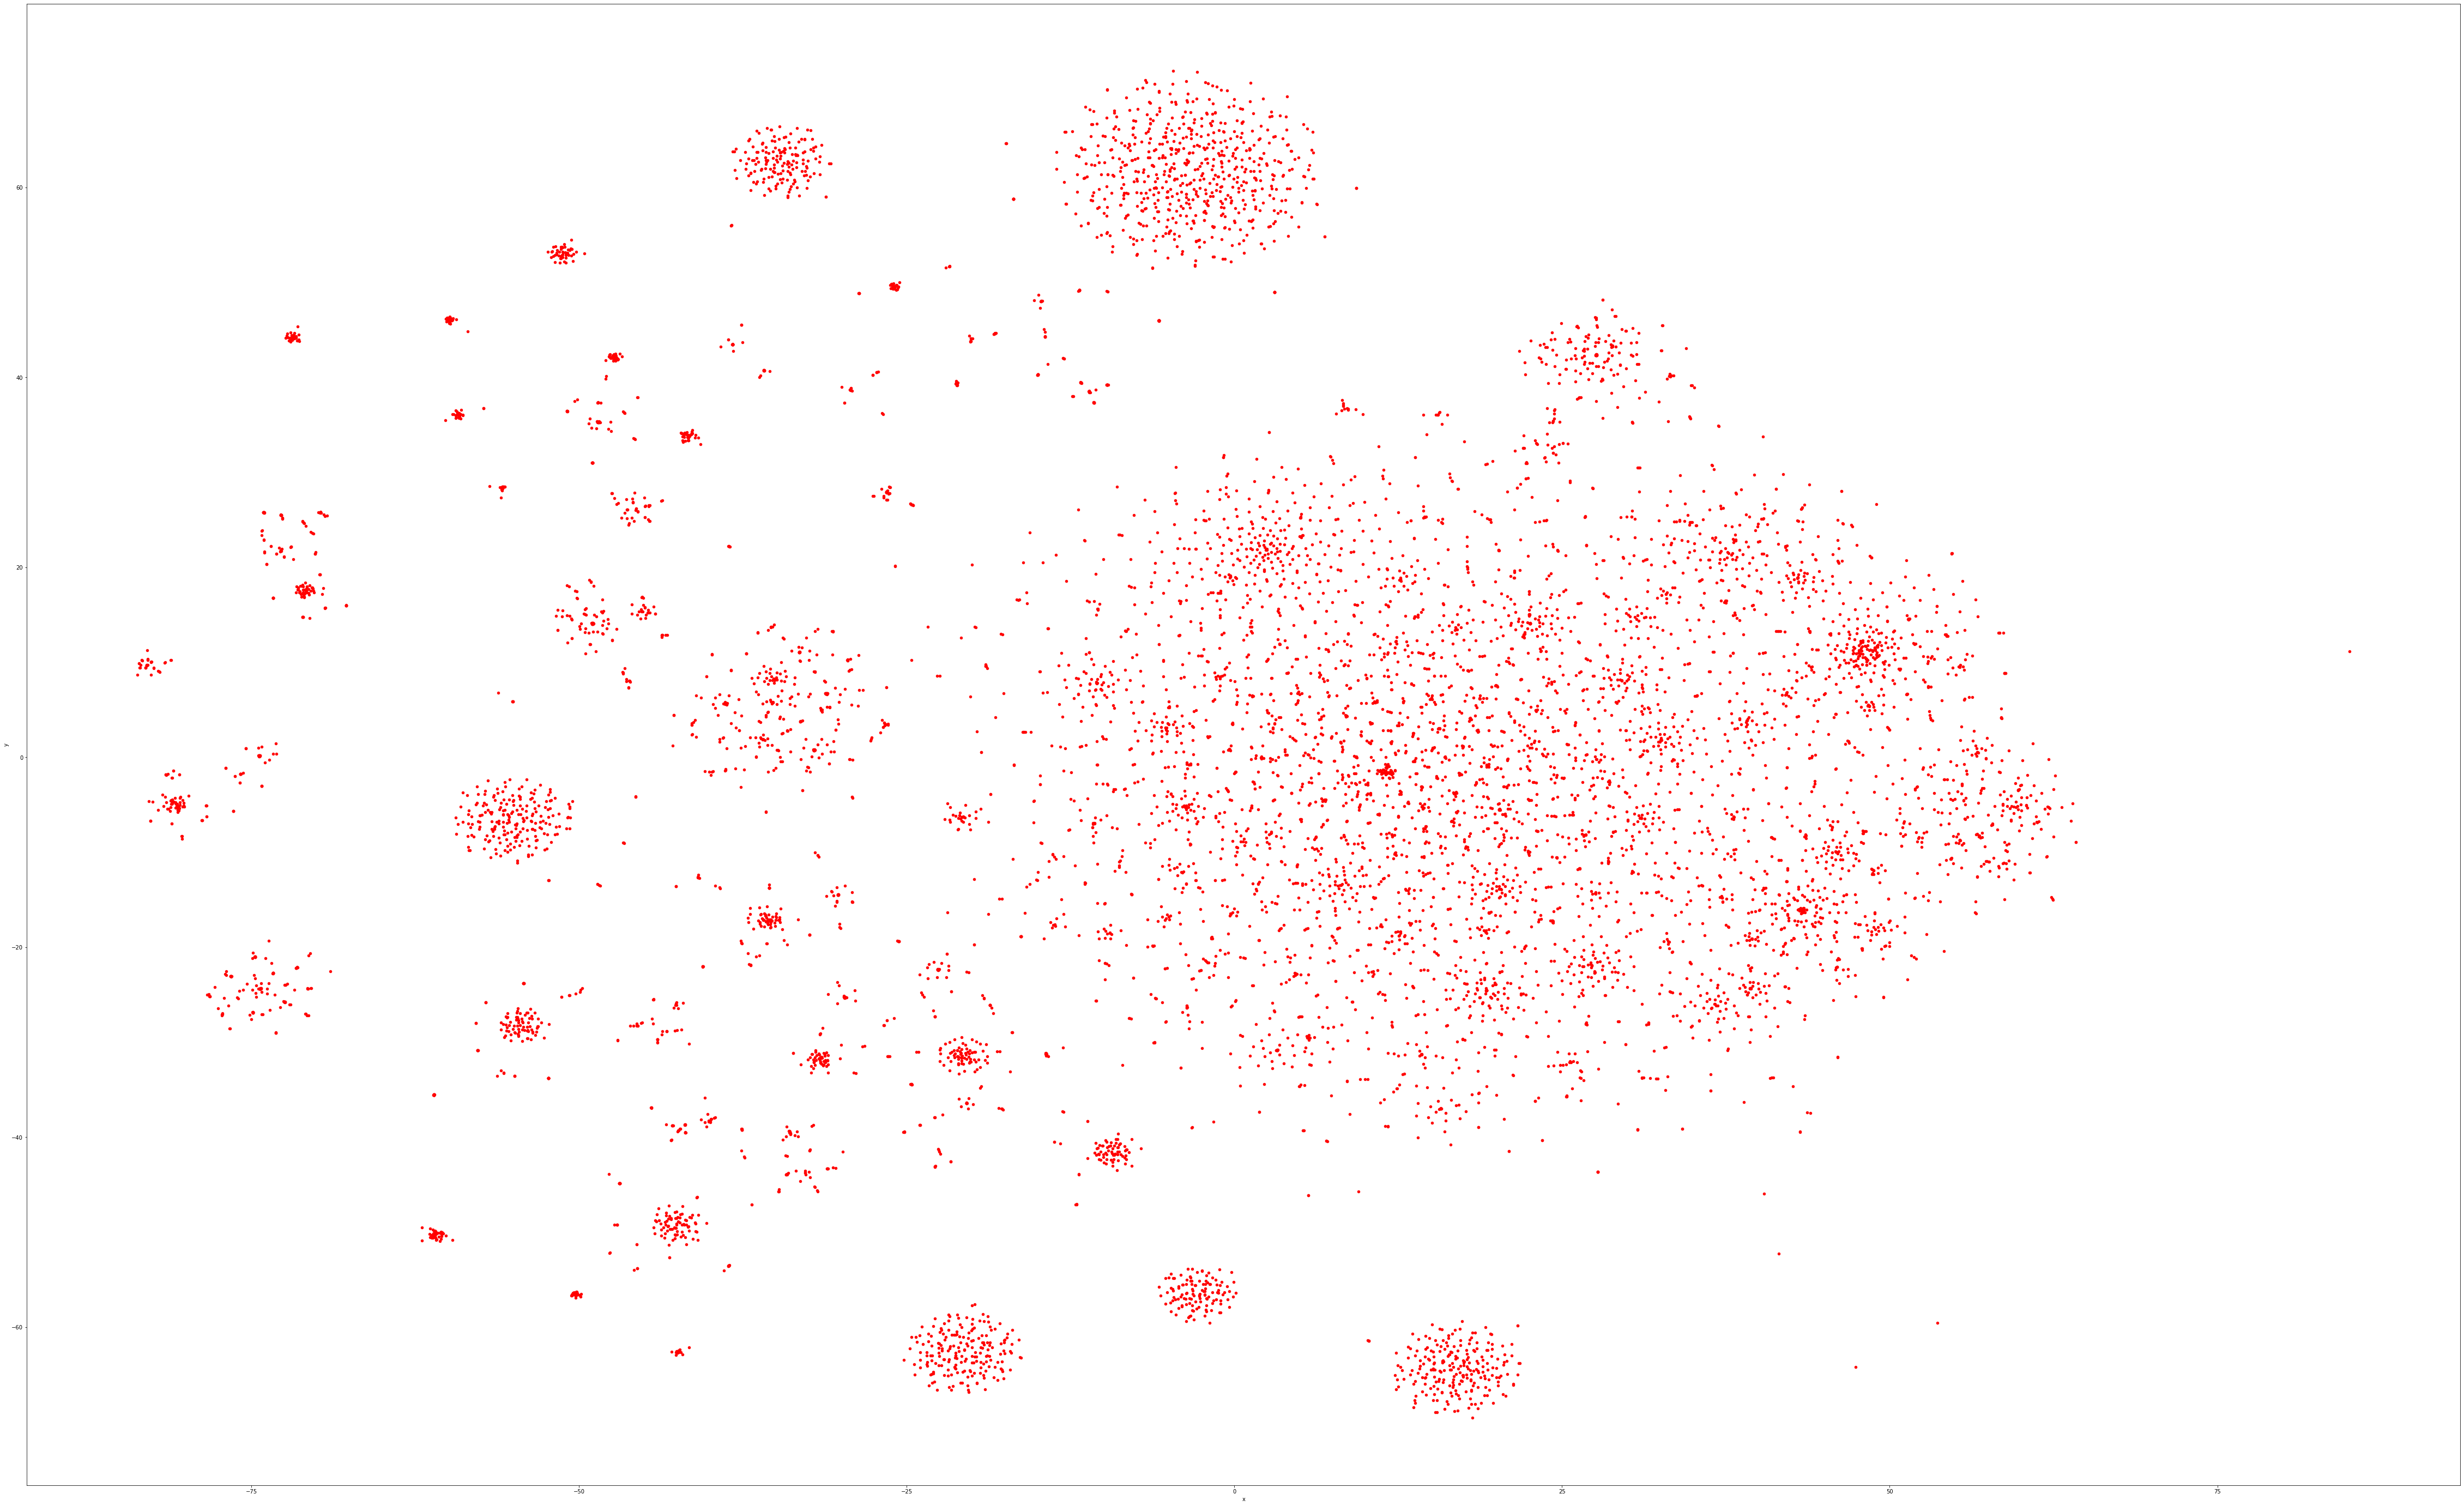

In [29]:
tsne_df.plot(kind='scatter',x='x',y='y',color='red', figsize=(80,50))
plt.show()

#### PCA Para las palabras

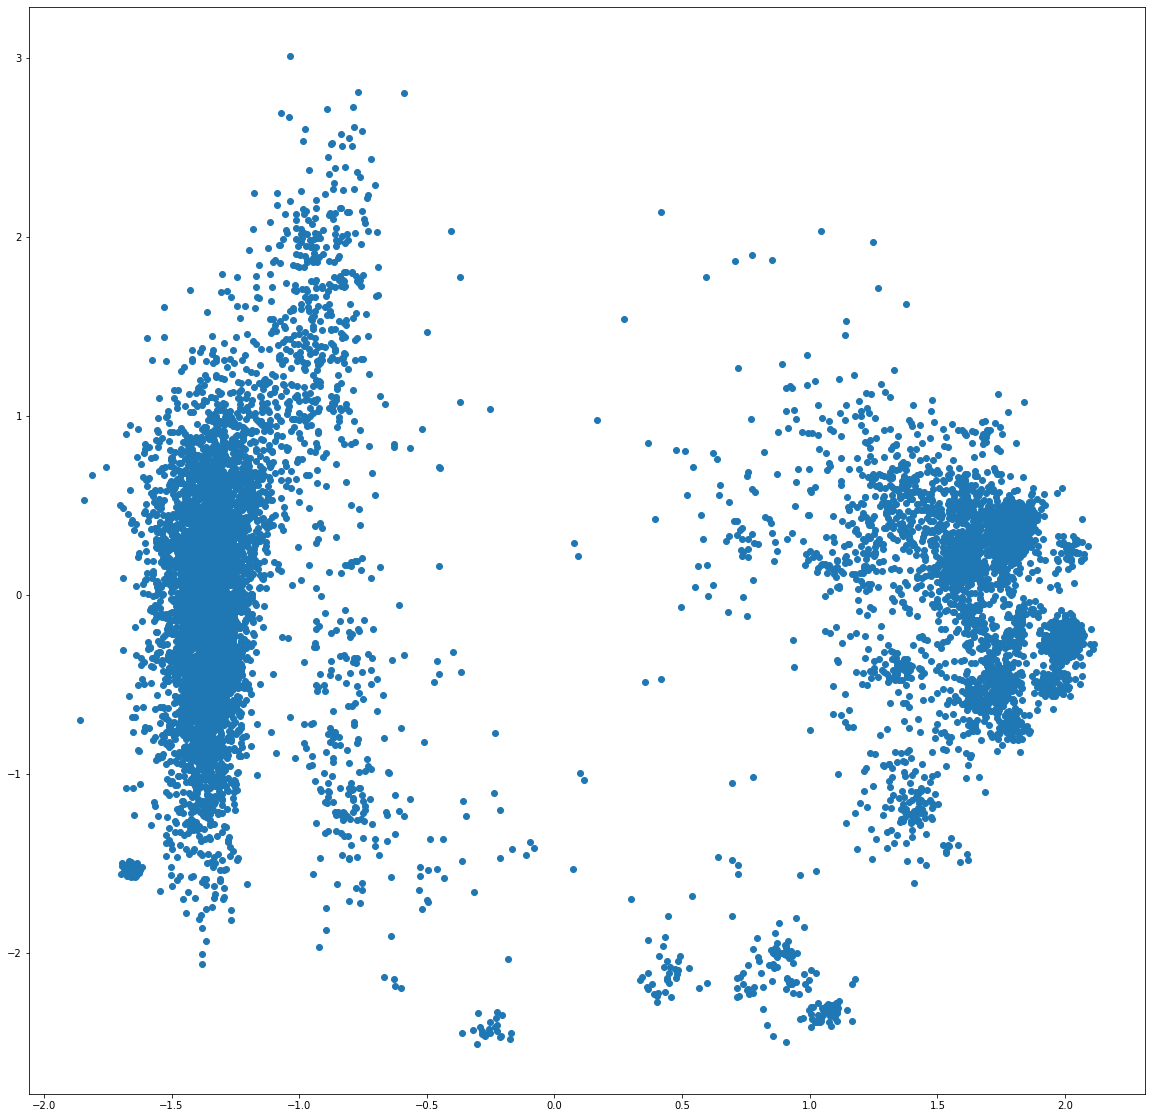

In [106]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
tweet_pca = PCA(n_components=2)
tweet_pc_result = tweet_pca.fit_transform(X)

plt.scatter(tweet_pc_result[:, 0], tweet_pc_result[:, 1])

### Visualización del diccionario

#### PCA

In [80]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

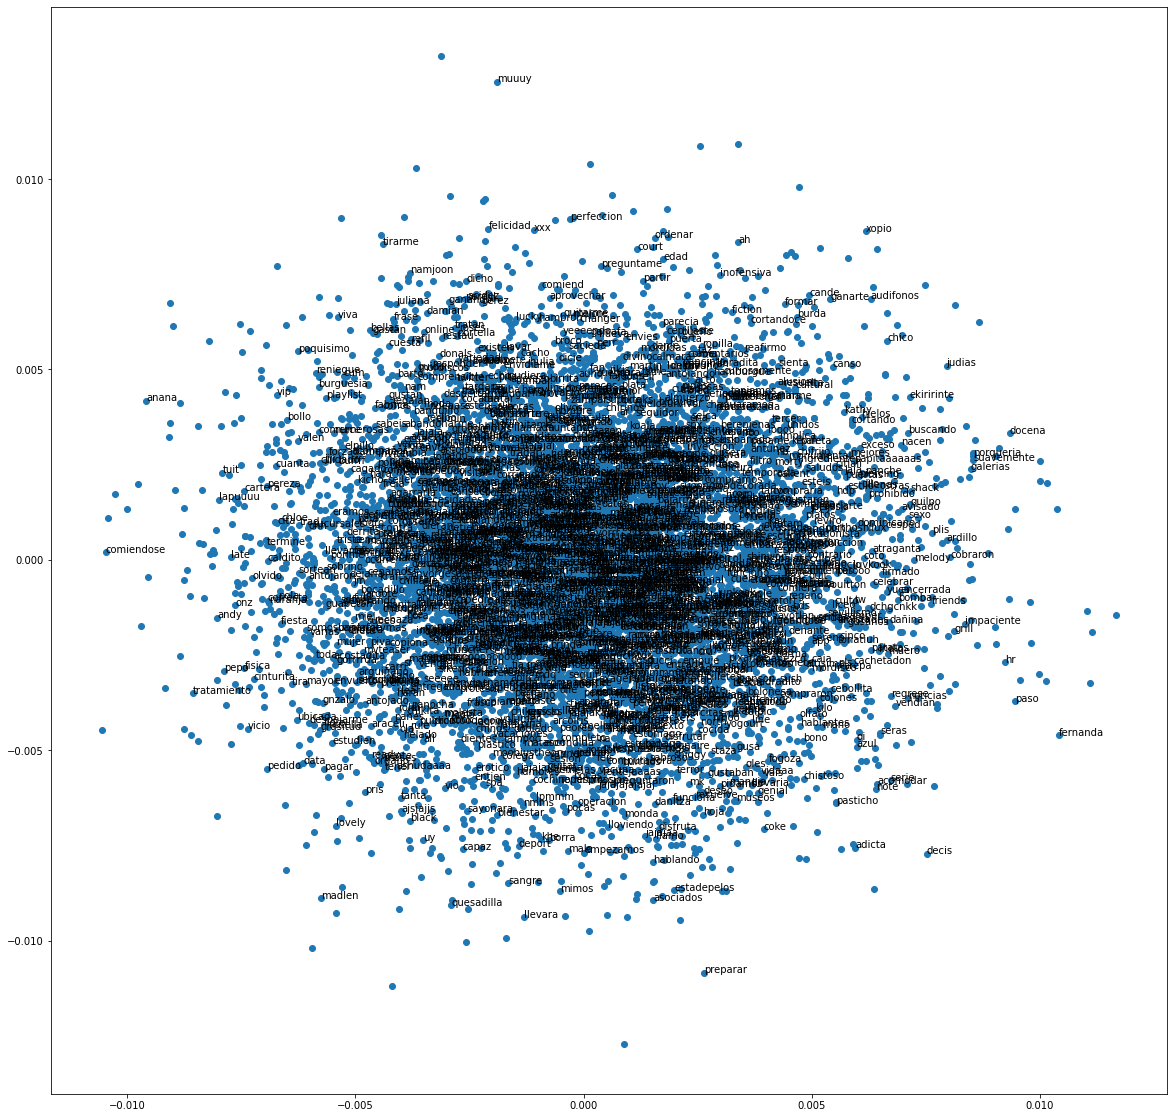

In [81]:
# create a scatter plot of the projection
plt.rcParams["figure.figsize"] = (20,20)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    if i % 5 == 0:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#### T-NSE

In [82]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [84]:
words_tsne_df = pd.DataFrame(X_tsne, index=None, columns=['x', 'y'])
print(words_tsne_df)

                 x         y
0    -5.023447e-07  0.000001
1    -5.184436e-07  0.000001
2    -5.296710e-07  0.000001
3    -5.399199e-07  0.000001
4    -5.137177e-07  0.000001
...            ...       ...
8574 -5.188476e-07  0.000001
8575 -5.545861e-07  0.000001
8576 -5.219686e-07  0.000001
8577 -5.655211e-07  0.000001
8578 -5.206720e-07  0.000001

[8579 rows x 2 columns]


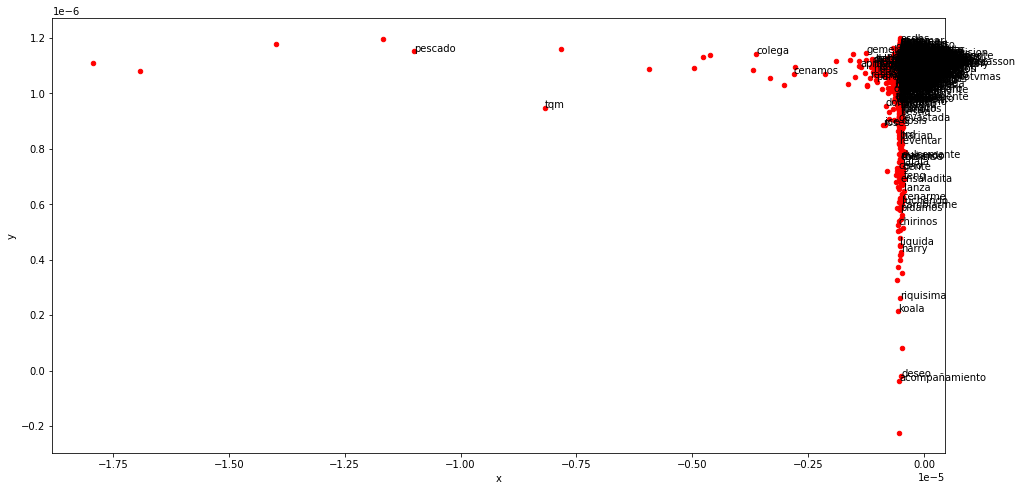

In [92]:
words_tsne_df.plot(kind='scatter',x='x',y='y',color='red', figsize=(16,8))

words = list(model.wv.vocab)
for i, word in enumerate(words):
    if i % 5 == 0:
        plt.annotate(word, xy=(words_tsne_df.iloc[i][0], words_tsne_df.iloc[i][1]))

plt.show()

### Algunos ejemplos cercanos

In [50]:
#model.infer_vector(["system", "response"])

result = model.wv.most_similar_cosmul(positive=['hamburguesa'])

for most_similar_key, similarity in result:
    print(f"{most_similar_key}: {similarity:.4f}")

restaurante: 0.6843
gomes: 0.6708
diosss: 0.6671
empezarmelo: 0.6561
computacion: 0.6539
opo: 0.6527
gustas: 0.6520
campeonato: 0.6519
palta: 0.6501
diego: 0.6491


### Estudio de clusters

In [100]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]

NUM_CLUSTERS=3

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

[1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 

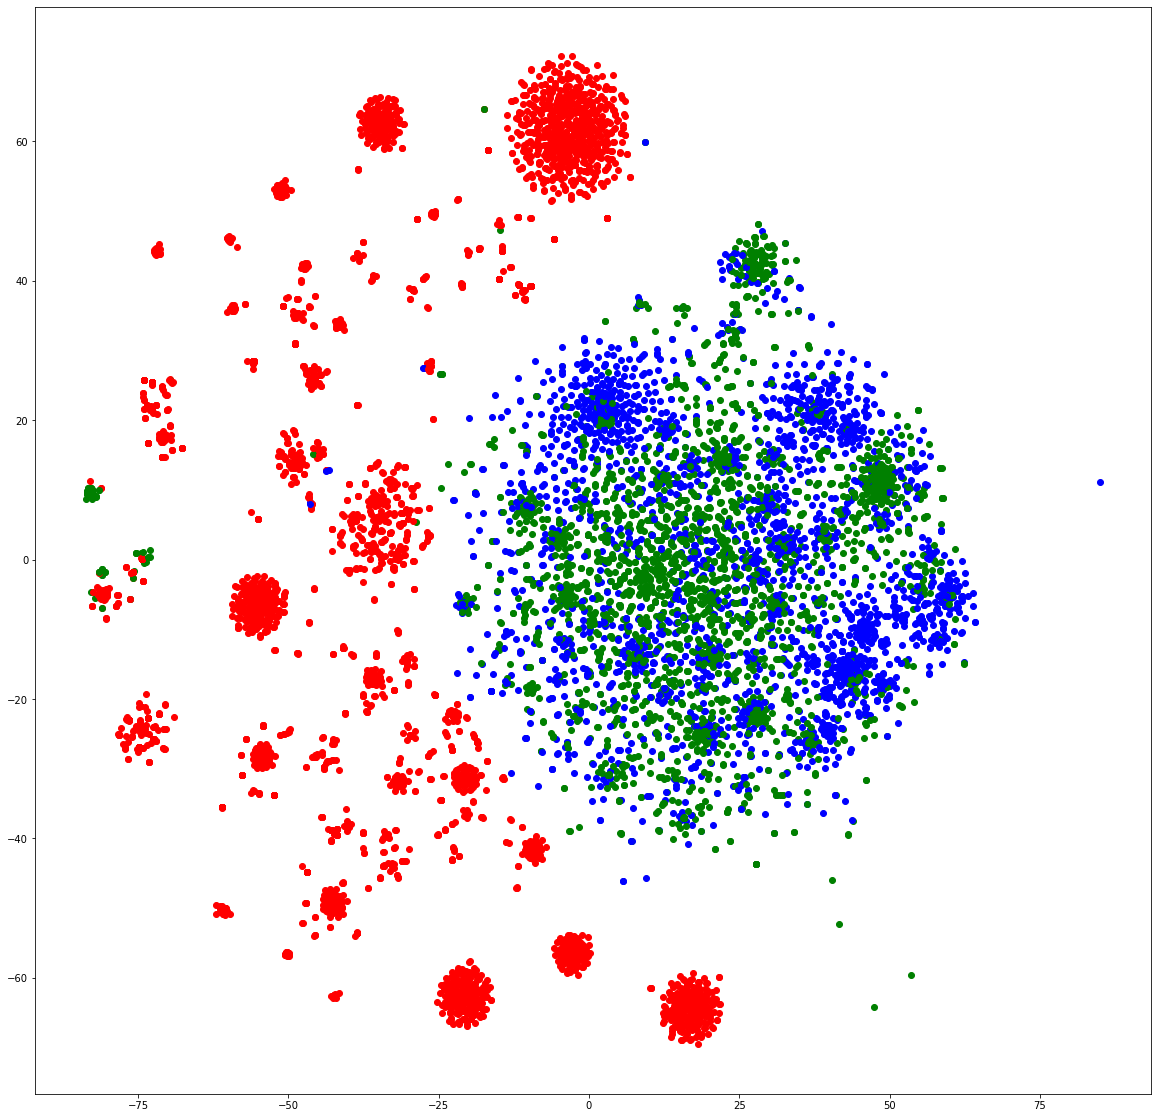

In [105]:
colors = ['red', 'blue', 'green']

for index, cluster in zip(range(len(tsne_df)) ,assigned_clusters):
    x = tsne_df.iloc[index]['x']
    y = tsne_df.iloc[index]['y']
    cluster = assigned_clusters[index]
    plt.scatter(x, y, color=colors[int(cluster)])

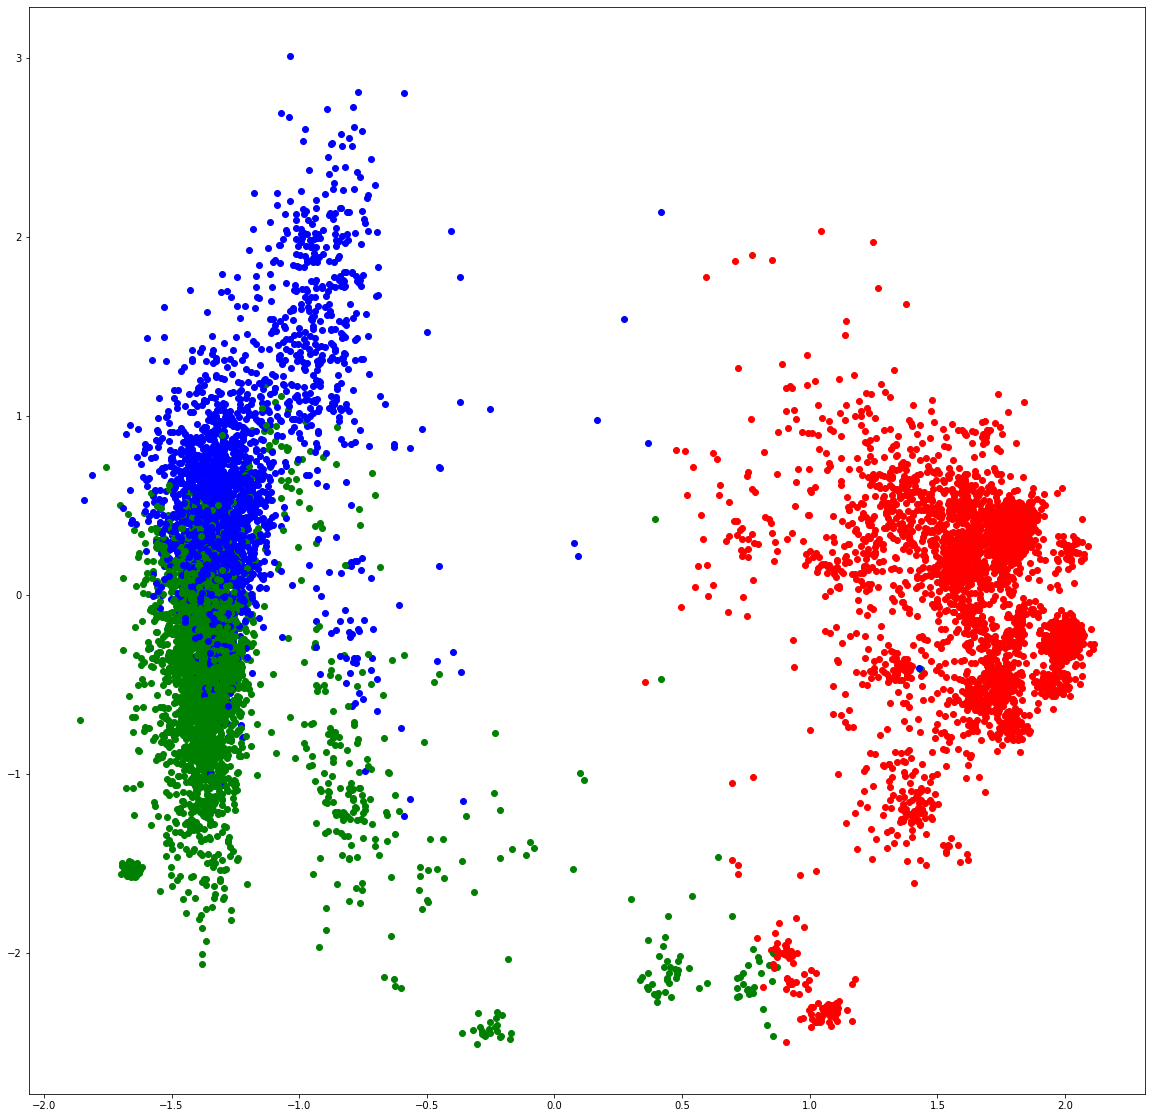

In [112]:
colors = ['red', 'blue', 'green']

for index, cluster in zip(range(len(tweet_pc_result)), assigned_clusters):
    x = tweet_pc_result[index][0]
    y = tweet_pc_result[index][1]
    cluster = assigned_clusters[index]
    plt.scatter(x, y, color=colors[int(cluster)])